In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from utils import StationData

# Read snowpack data

In [4]:
file_name = "PIT01__era5_15.pro"
data = StationData("/home/user/Documents/Programming/SnowPACK/Masterarbeit/output_optimization/" + file_name)

NameError: name 'StationData' is not defined

In [3]:
#time = pd.to_datetime('2017-03-03 07:00:00')
time = pd.to_datetime("23/03/17 11:00")
haerte = data.predictions[time].values["0534"]
hoehe = [0.] + data.predictions[time].values["0501"]

# Read manual data

In [4]:
folder_path = "../Profildaten_LAWIS"

data_layers = pd.read_csv(folder_path+"/profiles_hatvan_schichten.csv", header=0, na_filter="\\N")
data_temp = pd.read_csv(folder_path+"/profiles_hatvan_schneetemperaturen.csv", header = 0)

data_layers.set_index(keys=['profil_id'], drop=False,inplace=True)
print(data_temp)
profID=data_layers['profil_id'].unique().tolist()
profID = [ID for ID in profID if ID > 6000]
Pit1 = data_layers.loc[data_layers.profil_id==6233.0]
Pit2 = data_layers.loc[data_layers.profil_id==6251.0]
Pit3 = data_layers.loc[data_layers.profil_id==6252.0]
Pit4 = data_layers.loc[data_layers.profil_id==6287.0]
Pit5 = data_layers.loc[data_layers.profil_id==6288.0]
Pit6 = data_layers.loc[data_layers.profil_id==6289.0]
Pit7 = data_layers.loc[data_layers.profil_id==6291.0]
Pit8 = data_layers.loc[data_layers.profil_id==6333.0]
Pit9 = data_layers.loc[data_layers.profil_id==6400.0]
Pit10 = data_layers.loc[data_layers.profil_id==6401.0]
Pit11 = data_layers.loc[data_layers.profil_id==6402.0]

for pit in [Pit1, Pit2, Pit3, Pit4, Pit5, Pit6, Pit7, Pit8, Pit9, Pit10, Pit11]:
    pit["normedTop"] = pit["vonhoehe"]/max(pit["vonhoehe"])
    pit["normedBottom"] = pit["bishoehe"]/max(pit["vonhoehe"])
#     pit["temperature"] = 
#     print(pit)



     profil_id  oberkante  temperatur
0         6233      310.0        -7.9
1         6233      300.0       -10.2
2         6233      290.0        -9.8
3         6233      280.0        -9.1
4         6233      270.0        -8.6
5         6233      260.0        -7.9
6         6233      250.0        -7.3
7         6233      240.0        -6.6
8         6233      230.0        -6.1
9         6233      220.0        -5.8
10        6233      210.0        -5.2
11        6233      200.0        -5.2
12        6233      190.0        -4.9
13        6233      180.0        -4.3
14        6233      160.0        -4.3
15        6233      150.0        -4.1
16        6233      140.0        -3.8
17        6233      130.0        -3.6
18        6233      120.0        -3.3
19        6233      110.0        -3.3
20        6233       90.0        -3.3
21        6233       80.0        -3.2
22        6233       70.0        -3.2
23        6233       60.0        -3.0
24        6233       50.0        -3.0
25        62

c:\users\computer\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\computer\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Plotting

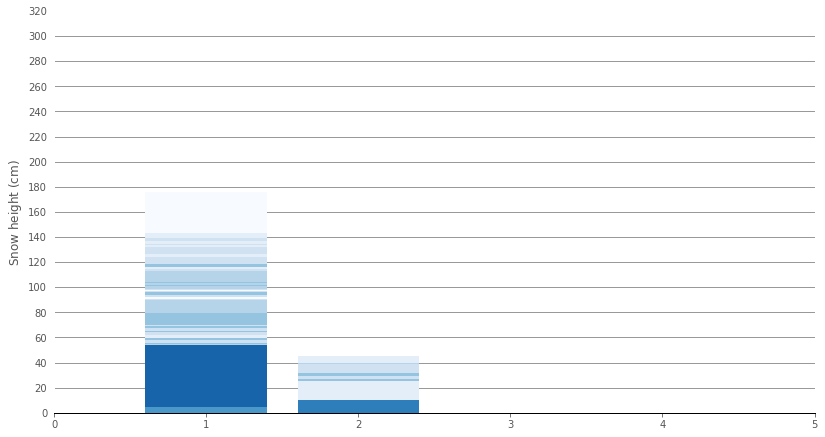

In [5]:
plt.style.use('ggplot')

file_name = "pit_harndess_snowpack"
norm = matplotlib.colors.Normalize(vmin=1, vmax=6, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=plt.get_cmap("Blues",11))

#pits = [Pit2, Pit6, Pit7, Pit9, Pit1, Pit3, Pit4, Pit5, Pit8, Pit10, Pit11]

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=.1, bottom=.05, right=.98, top=.98)

for i in range(len(haerte)):
    color = mapper.to_rgba(abs(haerte[i]))
    von = hoehe[i]
    bis = hoehe[i+1]
    plt.bar(x=0.6 ,bottom=bis, height=von-bis, left=0.0, width=0.8, color=color)

pit=Pit2
for von, bis, haerte_ in zip(pit["vonhoehe"],pit["bishoehe"],pit["haerte"]):
    color = mapper.to_rgba(haerte_)
    plt.bar(x=1.6 ,bottom=bis, height=von-bis, left=0.0, width=0.8, color=color)

        
hardnessnames = ["F","F - 4F", "4F", "4F - 1F", "1F", "1F - P", "P", "P - K", "K", "K - I", "I"]
#cbar = fig.colorbar(cax, ax=axes, ticks=np.linspace(1,6,12,endpoint=True) + 0.21, orientation='vertical')
#cbar.set_label("Hardness")
#cbar.ax.set_yticklabels(hardnessnames)

axes.set_ylabel("Snow height $(\\mathrm{cm})$")
ystep = 20
yticks = np.arange(0, 310+ystep, ystep)
axes.set_yticks(yticks)


#xticklabels = ["Pit %d" % i for i in [2,6,7,9,1,3,4,5,8,10,11]]
axes.set_xlim([0,5])
#axes.set_xticks(np.linspace(0,10,11,endpoint=True)+1.0)
#axes.set_xticklabels(xticklabels)
axes.xaxis.grid(False)
axes.yaxis.grid(True, color=".5", linestyle="-")

axes.set_facecolor((1.0, 1.0, 1.0))
axes.tick_params(axis='both', top=False, right=False, left=False, bottom=True)
axes.spines['bottom'].set_color('0.0')

plt.show()
#fig.savefig("../plots/%s.eps" % file_name)
#fig.savefig("../plots/%s.png" % file_name, dpi=200)


plt.show()

In [6]:
abs(haerte[1])

4.0